# PCA Exercises - Room temperature data
# Own implementation

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
sns.set(style="ticks")

In [6]:
df = pd.read_csv('data_sets/room-temperature.csv')
df.head()

,Date,FrontLeft,FrontRight,BackLeft,BackRight
0,4/11/2010 11:30,295.2,297.0,295.8,296.3
1,4/11/2010 12:00,296.2,296.4,296.2,296.3
2,4/11/2010 12:30,297.3,297.5,296.7,297.1
3,4/11/2010 13:00,295.9,296.7,297.4,297.0
4,4/11/2010 13:30,297.2,296.5,297.6,297.4


## Preprocessing the data  

In [7]:
df = df.set_index('Date', drop=True)
df.head()

,FrontLeft,FrontRight,BackLeft,BackRight
Date,,,,
4/11/2010 11:30,295.2,297.0,295.8,296.3
4/11/2010 12:00,296.2,296.4,296.2,296.3
4/11/2010 12:30,297.3,297.5,296.7,297.1
4/11/2010 13:00,295.9,296.7,297.4,297.0
4/11/2010 13:30,297.2,296.5,297.6,297.4


In [8]:
df.describe()

,FrontLeft,FrontRight,BackLeft,BackRight
count,144.000000,144.000000,144.00000,144.000000
mean,294.507639,294.628472,295.06250,294.977083
std,1.644532,1.715118,1.58771,1.647533
min,290.200000,291.100000,291.90000,292.100000
25%,293.100000,293.300000,293.67500,293.475000
50%,294.400000,294.400000,295.10000,295.000000
75%,295.800000,295.800000,296.32500,296.500000
max,298.100000,299.000000,297.60000,298.200000


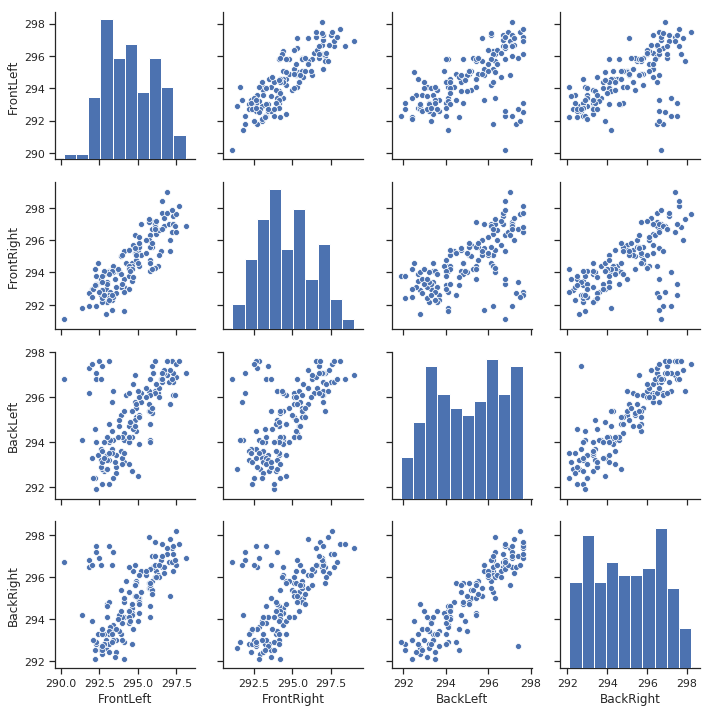

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
df = df.apply(lambda x: x-x.mean())  # centering
df = df.apply(lambda x: x/x.std())  # scaling
df.describe()

,FrontLeft,FrontRight,BackLeft,BackRight
count,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02
mean,-4.810966e-16,-2.731611e-15,1.270589e-15,5.970533e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.619370e+00,-2.057276e+00,-1.991863e+00,-1.746297e+00
25%,-8.559509e-01,-7.745659e-01,-8.739004e-01,-9.117165e-01
50%,-6.545258e-02,-1.332108e-01,2.361893e-02,1.390968e-02
75%,7.858533e-01,6.830594e-01,7.951706e-01,9.243616e-01
max,2.184427e+00,2.548820e+00,1.598214e+00,1.956207e+00


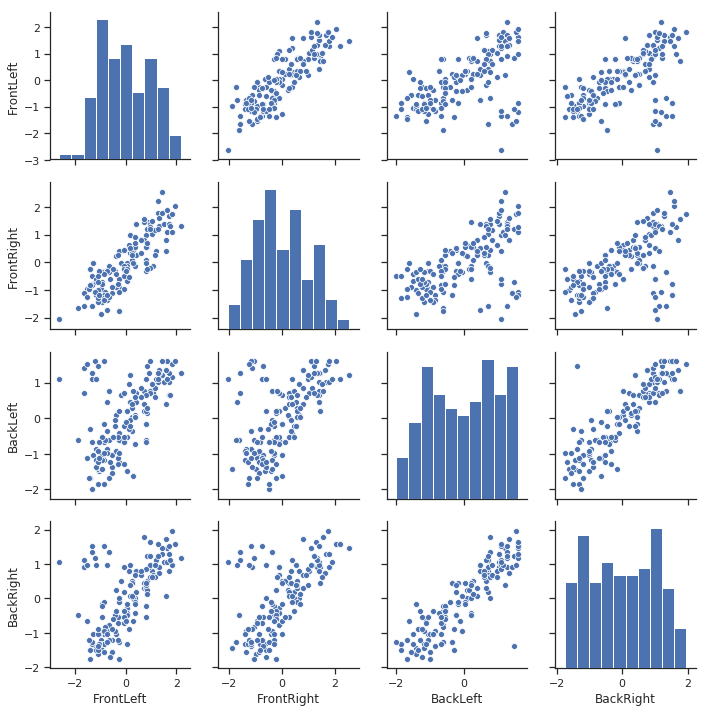

In [11]:
sns.pairplot(df)
plt.show()

## Building the own model 


In [263]:
df_array = df.to_numpy()

def sort_singular_vectors(s_ascending_indices: np.array, u: np.array) -> np.array:
    all_indices = np.arange(u.shape[0])
    all_indices_without_s_indices = np.delete(all_indecies, s_ascending_indices, axis=0)
    all_indices_orderd = np.concatenate((s_ascending_indices, all_indices_without_s_indices), axis=None)
    return u[all_indices_orderd, :]


def svd(x: np.array) -> Tuple[np.array, np.array, np.array]:
    """ Conduct the Singular Value Decomposiition"""
    N = x.shape[0]
    D = x.shape[1]
    xTx = x.T.dot(x)
    xxT = x.dot(x.T)
    s_sq, v = np.linalg.eig(xTx)  
    _,    u = np.linalg.eig(xxT)
    s_ascending_indices = np.flip(np.argsort(s_sq))
    s_sq = s_sq[s_ascending_indices]    
    s = np.pad(np.diag(np.sqrt(s_sq)), [(0, N - D), (0, 0)], 'constant')
    v = v[s_ascending_indices, :]  # sort according to eigenvalues
    u = sort_singular_vectors(s_ascending_indices, u)
    return u, s, v

class OwnPCA:
    def __init__(self, component_no: int):
        self.component_no = component_no
        self._u = None
        self._s = None
        self._v = None
        
    def fit_transform(self, arr: np.array):
        u, s, v = svd(arr)
        self._u = u[:self.component_no]
        self._s = s[:self.component_no, :self.component_no]
        self._v = v[:self.component_no]
        return u, s, v
    

In [229]:
n_components = 3
own_pca = OwnPCA(n_components)
u, s, v = own_pca.fit_transform(df_array)

In [230]:
a = np.pad(np.array([[2,4], [1,3]]), ((0, 2), (0,0)), 'constant')

In [231]:
a

array([[2, 4],
       [1, 3],
       [0, 0],
       [0, 0]])

In [264]:
u, s, v = svd(a)
svd(a)

(array([[ 0.57604844,  0.81741556,  0.        ,  0.        ],
        [ 0.81741556, -0.57604844,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[5.4649857 , 0.        ],
        [0.        , 0.36596619],
        [0.        , 0.        ],
        [0.        , 0.        ]]),
 array([[ 0.40455358, -0.9145143 ],
        [-0.9145143 , -0.40455358]]))

In [234]:
u

array([[ 0.57604844,  0.81741556,  0.        ,  0.        ],
       [ 0.81741556, -0.57604844,  0.        ,  0.        ]])

In [268]:
s_sq, v = np.linalg.eig(xTx)  
_,    u = np.linalg.eig(xxT)
s_ascending_indices = np.flip(np.argsort(s_sq))
s_sq = s_sq[s_ascending_indices]    
s = np.pad(np.diag(np.sqrt(s_sq)), [(0, N - D), (0, 0)], 'constant')
tmp = u
display(u)
display(s)
display(v)

v = v[s_ascending_indices, :]  # sort according to eigenvalues
u = u[s_ascending_indices, :] # sort according to eigenvalues
u

array([[ 0.81741556, -0.57604844,  0.        ,  0.        ],
       [ 0.57604844,  0.81741556,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

array([[5.4649857 , 0.        ],
       [0.        , 0.36596619],
       [0.        , 0.        ],
       [0.        , 0.        ]])

array([[-0.9145143 , -0.40455358],
       [ 0.40455358, -0.9145143 ]])

array([[ 0.57604844,  0.81741556,  0.        ,  0.        ],
       [ 0.81741556, -0.57604844,  0.        ,  0.        ]])

In [ ]:
def sort_singular_vectors(s_ascending_indices: np.array, u: np.array) -> np.array:
    all_indices = np.arange(u.shape[0])
    all_indices_without_s_indices = np.delete(all_indecies, s_ascending_indices, axis=0)
    all_indices_orderd = np.concatenate((s_ascending_indices, all_indices_without_s_indices), axis=None)
    return u[all_indices_orderd, :]


In [265]:
u = tmp
all_indecies = np.arange(u.shape[0])
all_indecies = np.delete(all_indecies, s_ascending_indecies, axis=0)
all_indecies = np.concatenate((s_ascending_indecies, all_indecies), axis=None)
all_indecies
display(u)
display(u[all_indecies, :])

array([[ 0.81741556, -0.57604844,  0.        ,  0.        ],
       [ 0.57604844,  0.81741556,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

array([[ 0.57604844,  0.81741556,  0.        ,  0.        ],
       [ 0.81741556, -0.57604844,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [256]:
np.where(all_indecies == 2)

(array([2]),)

In [258]:
s_ascending_indecies

array([1, 0])

In [223]:
s_sq, v = np.linalg.eig(xTx) 
s_ascending_indecies = np.flip(np.argsort(s_sq))
display(s_sq[s_ascending_indecies])
v

array([29.86606875,  0.13393125])

array([[-0.9145143 , -0.40455358],
       [ 0.40455358, -0.9145143 ]])

In [211]:
s_sq

array([ 0.13393125, 29.86606875])

In [212]:
z[0] = 5
z_arg_sort = np.argsort(z)

z

array([5, 2, 3, 4])

In [213]:
z[z_arg_sort]

array([2, 3, 4, 5])

In [214]:
xTx = a.T.dot(a)
N = a.shape[0]
D = a.shape[1]

In [215]:
s_sq, v = np.linalg.eigh(xTx) 
s_sq = np.flip(s_sq)  # eigenvalues was ascending
s = np.pad(np.diag(np.sqrt(s_sq)), [(0, N - D), (0, 0)], 'constant')
s

array([[5.4649857 , 0.        ],
       [0.        , 0.36596619],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [216]:
s_sq, v = np.linalg.eigh(xTx) 
v = v  # sort according to eigenvalues
v = np.fliplr(v)
display(v)


array([[ 0.40455358, -0.9145143 ],
       [ 0.9145143 ,  0.40455358]])

In [217]:
xxT = a.dot(a.T)

_,    u = np.linalg.eig(xxT)
u = np.fliplr(u)
display(u)


array([[ 0.        ,  0.        , -0.57604844,  0.81741556],
       [ 0.        ,  0.        ,  0.81741556,  0.57604844],
       [ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ]])

In [218]:
u.dot(s.dot(v.T))

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-0.33468131,  0.14805293],
       [ 2.21087956,  4.99780755]])

In [219]:
svd(a)

(array([[ 0.57604844,  0.81741556,  0.        ,  0.        ],
        [ 0.81741556, -0.57604844,  0.        ,  0.        ]]),
 array([[5.4649857 , 0.        ],
        [0.        , 0.36596619],
        [0.        , 0.        ],
        [0.        , 0.        ]]),
 array([[ 0.40455358, -0.9145143 ],
        [-0.9145143 , -0.40455358]]))

In [121]:
N = 4
np.pad(a, [(0, N), (0, 0)], 'constant')

array([[1, 2],
       [3, 4],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

In [122]:
u.shape

(144, 144)

In [123]:
s.shape

(144, 4)

In [124]:
v.shape

(4, 4)

In [131]:
x_approx = u.dot(s).dot(v.T)

In [132]:
from sklearn.decomposition import PCA

pca = PCA(n_components=n_components)
pca.fit_transform(df_array)
pca.components_

array([[ 0.49127375,  0.50211307,  0.49486494,  0.51150881],
       [-0.5308801 , -0.47235221,  0.53968805,  0.4514272 ],
       [ 0.68995833, -0.71672467,  0.09011509, -0.04628735]])

In [133]:
df_array - x_approx

array([[ 5.14088116e-01,  1.27952607e+00,  5.05533482e-01,
         7.55404486e-01],
       [-1.62674550e+00,  2.25503455e+00, -6.31290346e-01,
         1.21009682e+00],
       [ 1.15620336e+00,  1.63560773e+00, -4.10325021e-01,
         5.83715760e-01],
       [-5.82899873e-01, -2.09472349e-01,  1.79836612e+00,
         1.36164208e+00],
       [ 1.64881190e+00,  1.38059839e+00,  1.75536713e+00,
         1.18163495e+00],
       [ 1.93026803e+00,  2.99798150e+00,  1.33092140e+00,
         1.75191074e+00],
       [ 6.97801246e-01,  3.24893139e+00,  2.91119620e+00,
         7.59494985e-02],
       [ 1.05496464e+00,  1.72387773e+00,  2.95018556e+00,
         1.64276843e+00],
       [ 1.85398923e+00, -2.84918790e-01,  1.26269631e+00,
         4.13987381e-01],
       [ 1.76551079e+00,  1.99486000e+00,  8.77895411e-01,
         1.01684874e+00],
       [-8.41906710e-01, -5.40125943e-01, -1.05819023e+00,
        -1.00433397e+00],
       [ 4.62237692e-01, -3.39988307e-01, -1.06842215e+00,
      

In [55]:
np.linalg.eigh(b.dot(b.T))

(array([ 40.53301857, 121.91793835, 180.80431363, 395.74472945]),
 array([[-0.37422641,  0.68065006,  0.09976357, -0.621866  ],
        [ 0.64264284,  0.25728539,  0.72159629,  0.01063961],
        [-0.16597904, -0.68491679,  0.40065871, -0.58550197],
        [-0.64762314,  0.03753296,  0.55571451,  0.51995858]]))

In [56]:
np.linalg.eigh(b.T.dot(b))

(array([ 40.53301857, 121.91793835, 180.80431363, 395.74472945]),
 array([[ 0.83238698, -0.38810266, -0.08027444, -0.38738127],
        [ 0.31182625,  0.89455329,  0.18152149, -0.2637968 ],
        [-0.43770305, -0.15096399,  0.26811659, -0.84483099],
        [-0.1353231 ,  0.1623595 , -0.94271918, -0.25808446]]))

In [13]:
a = np.array([[1,2], [3, 4]])

In [14]:
a

array([[1, 2],
       [3, 4]])

In [16]:
a.dot(a)

array([[ 7, 10],
       [15, 22]])

In [46]:
z = np.array([1,2,3,4])

In [52]:
np.flipud(a)

array([[3, 4],
       [1, 2]])

In [18]:
np.linalg.eigvals(a)

array([-0.37228132,  5.37228132])

In [21]:
np.diag(np.sqrt(np.linalg.eigvals(a)))

/home/jacek/.local/share/virtualenvs/machine-learning-W9umnyAZ/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[       nan, 0.        ],
       [0.        , 2.31781822]])

In [23]:
np.diag(np.sqrt(np.linalg.eigvals(a.T.dot(a))))


array([[0.36596619, 0.        ],
       [0.        , 5.4649857 ]])

In [30]:
b = np.random.randint(-11, 10, size=(4, 4))

In [39]:
np.linalg.eigh(b.dot(b.T), UPLO='L')

(array([ 40.53301857, 121.91793835, 180.80431363, 395.74472945]),
 array([[-0.37422641,  0.68065006,  0.09976357, -0.621866  ],
        [ 0.64264284,  0.25728539,  0.72159629,  0.01063961],
        [-0.16597904, -0.68491679,  0.40065871, -0.58550197],
        [-0.64762314,  0.03753296,  0.55571451,  0.51995858]]))

In [41]:
np.linalg.eigh(b.dot(b.T))

(array([ 40.53301857, 121.91793835, 180.80431363, 395.74472945]),
 array([[-0.37422641,  0.68065006,  0.09976357, -0.621866  ],
        [ 0.64264284,  0.25728539,  0.72159629,  0.01063961],
        [-0.16597904, -0.68491679,  0.40065871, -0.58550197],
        [-0.64762314,  0.03753296,  0.55571451,  0.51995858]]))

In [42]:
np.linalg.eig(b.T.dot(b))

(array([395.74472945,  40.53301857, 121.91793835, 180.80431363]),
 array([[ 0.38738127,  0.83238698, -0.38810266,  0.08027444],
        [ 0.2637968 ,  0.31182625,  0.89455329, -0.18152149],
        [ 0.84483099, -0.43770305, -0.15096399, -0.26811659],
        [ 0.25808446, -0.1353231 ,  0.1623595 ,  0.94271918]]))

In [31]:
np.diag(np.sqrt(np.linalg.eigvals(b.T.dot(b))))

array([[19.89333379,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  6.36655469,  0.        ,  0.        ],
       [ 0.        ,  0.        , 11.04164564,  0.        ],
       [ 0.        ,  0.        ,  0.        , 13.44634945]])

## Building the model 


In [86]:
from sklearn.decomposition import PCA
df_array = df.to_numpy()

In [87]:
def PCA_check(arr: np.array, n_components: int) -> None:
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(arr)
    df_principal_components = pd.DataFrame(data = principalComponents)
    df_reconstruction = pca.inverse_transform(df_principal_components)
    mse = ((df_reconstruction - arr) ** 2).mean()
    print(f'Componenent number = {n_components}\nReconstruction MSE = {mse}')

In [88]:
n_components = 3
PCA_check(df_array, n_components)

Componenent number = 3
Reconstruction MSE = 0.028070367550698708


In [89]:
n_components = 2
PCA_check(df_array, n_components)

Componenent number = 2
Reconstruction MSE = 0.06450170281888937


In [90]:
n_components = 1
PCA_check(df_array, n_components)

Componenent number = 1
Reconstruction MSE = 0.2322954610395971


### Looking closer to the 3 component PCA

In [105]:
n_components = 3
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(df_array)
df_principal_components = pd.DataFrame(data = principalComponents)
df_reconstruction = pca.inverse_transform(df_principal_components)

In [116]:
display(df.columns)
pca.components_  # principal axes in feature space, size = (n_components, n_features)

Index(['FrontLeft', 'FrontRight', 'BackLeft', 'BackRight'], dtype='object')

array([[ 0.49127375,  0.50211307,  0.49486494,  0.51150881],
       [-0.5308801 , -0.47235221,  0.53968805,  0.4514272 ],
       [ 0.68995833, -0.71672467,  0.09011509, -0.04628735]])

We can see above that the **first** prinicipal axis is explaining mean temperture, the **second** one front vs back relation, and the **third** one left vs right focused on the front.

In [111]:
pca.explained_variance_  # The amount of variance explained by each of the selected components.

array([3.06432038, 0.67586856, 0.1467444 ])

In [112]:
pca.explained_variance_ratio_  # Percentage of variance explained by each of the selected components.

array([0.7660801 , 0.16896714, 0.0366861 ])

In [113]:
pca.singular_values_  # The singular values corresponding to each of the selected components.

array([20.93317497,  9.83103274,  4.58087864])

## Time series of the first two components and all readinings

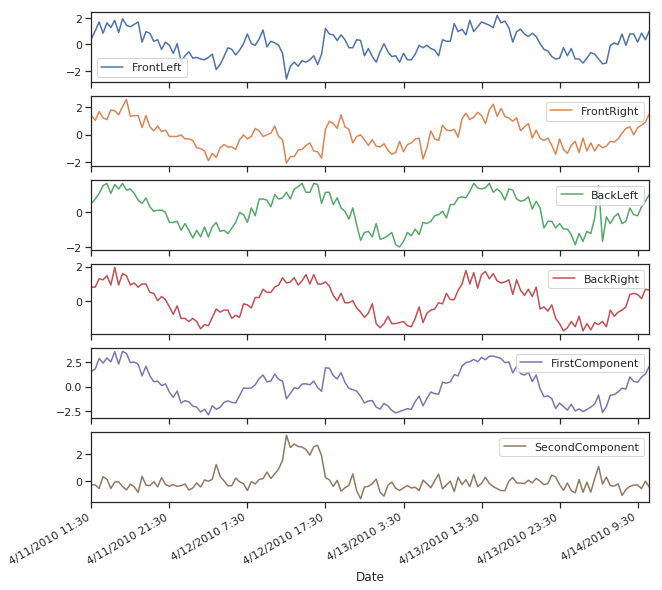

In [147]:
df_combined = df.copy()
df_combined['FirstComponent'] = df_principal_components.set_index(df_combined.index).iloc[:,0]
df_combined['SecondComponent'] = df_principal_components.set_index(df_combined.index).iloc[:,1]
df_combined.plot(subplots=True, figsize=(10, 10))
plt.show()

We can see that the first component shows mean of the reading (mostly of the front ones) and the second component track the difference between front and the back.

## Bar plot of the loadings for the second component

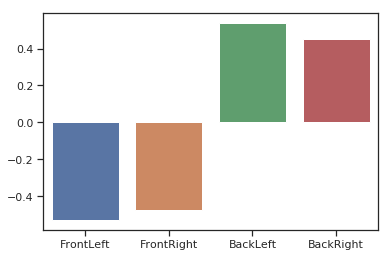

In [145]:
sns.barplot(df.columns, pca.components_[1])
plt.show()

## I couldn't find any easy to apply brushing/linking tool for jupyter so I will skip this part :(

In [ ]:
z